In [38]:
socar = pd.read_csv("insurance_fraud_detect_data.csv")
pd.set_option('display.max_columns', len(socar.columns))
socar.head()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,0,4,2,4,1.302547e+05,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,0,1,4,4,0.000000e+00,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,0,1,4,6,2.581306e+05,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,0,3,3,5,1.341009e+06,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,0,1,1,1,5.240306e+05,1209410,1,0,0,2,0,0,0,-1,0


In [39]:
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Arial Unicode MS')

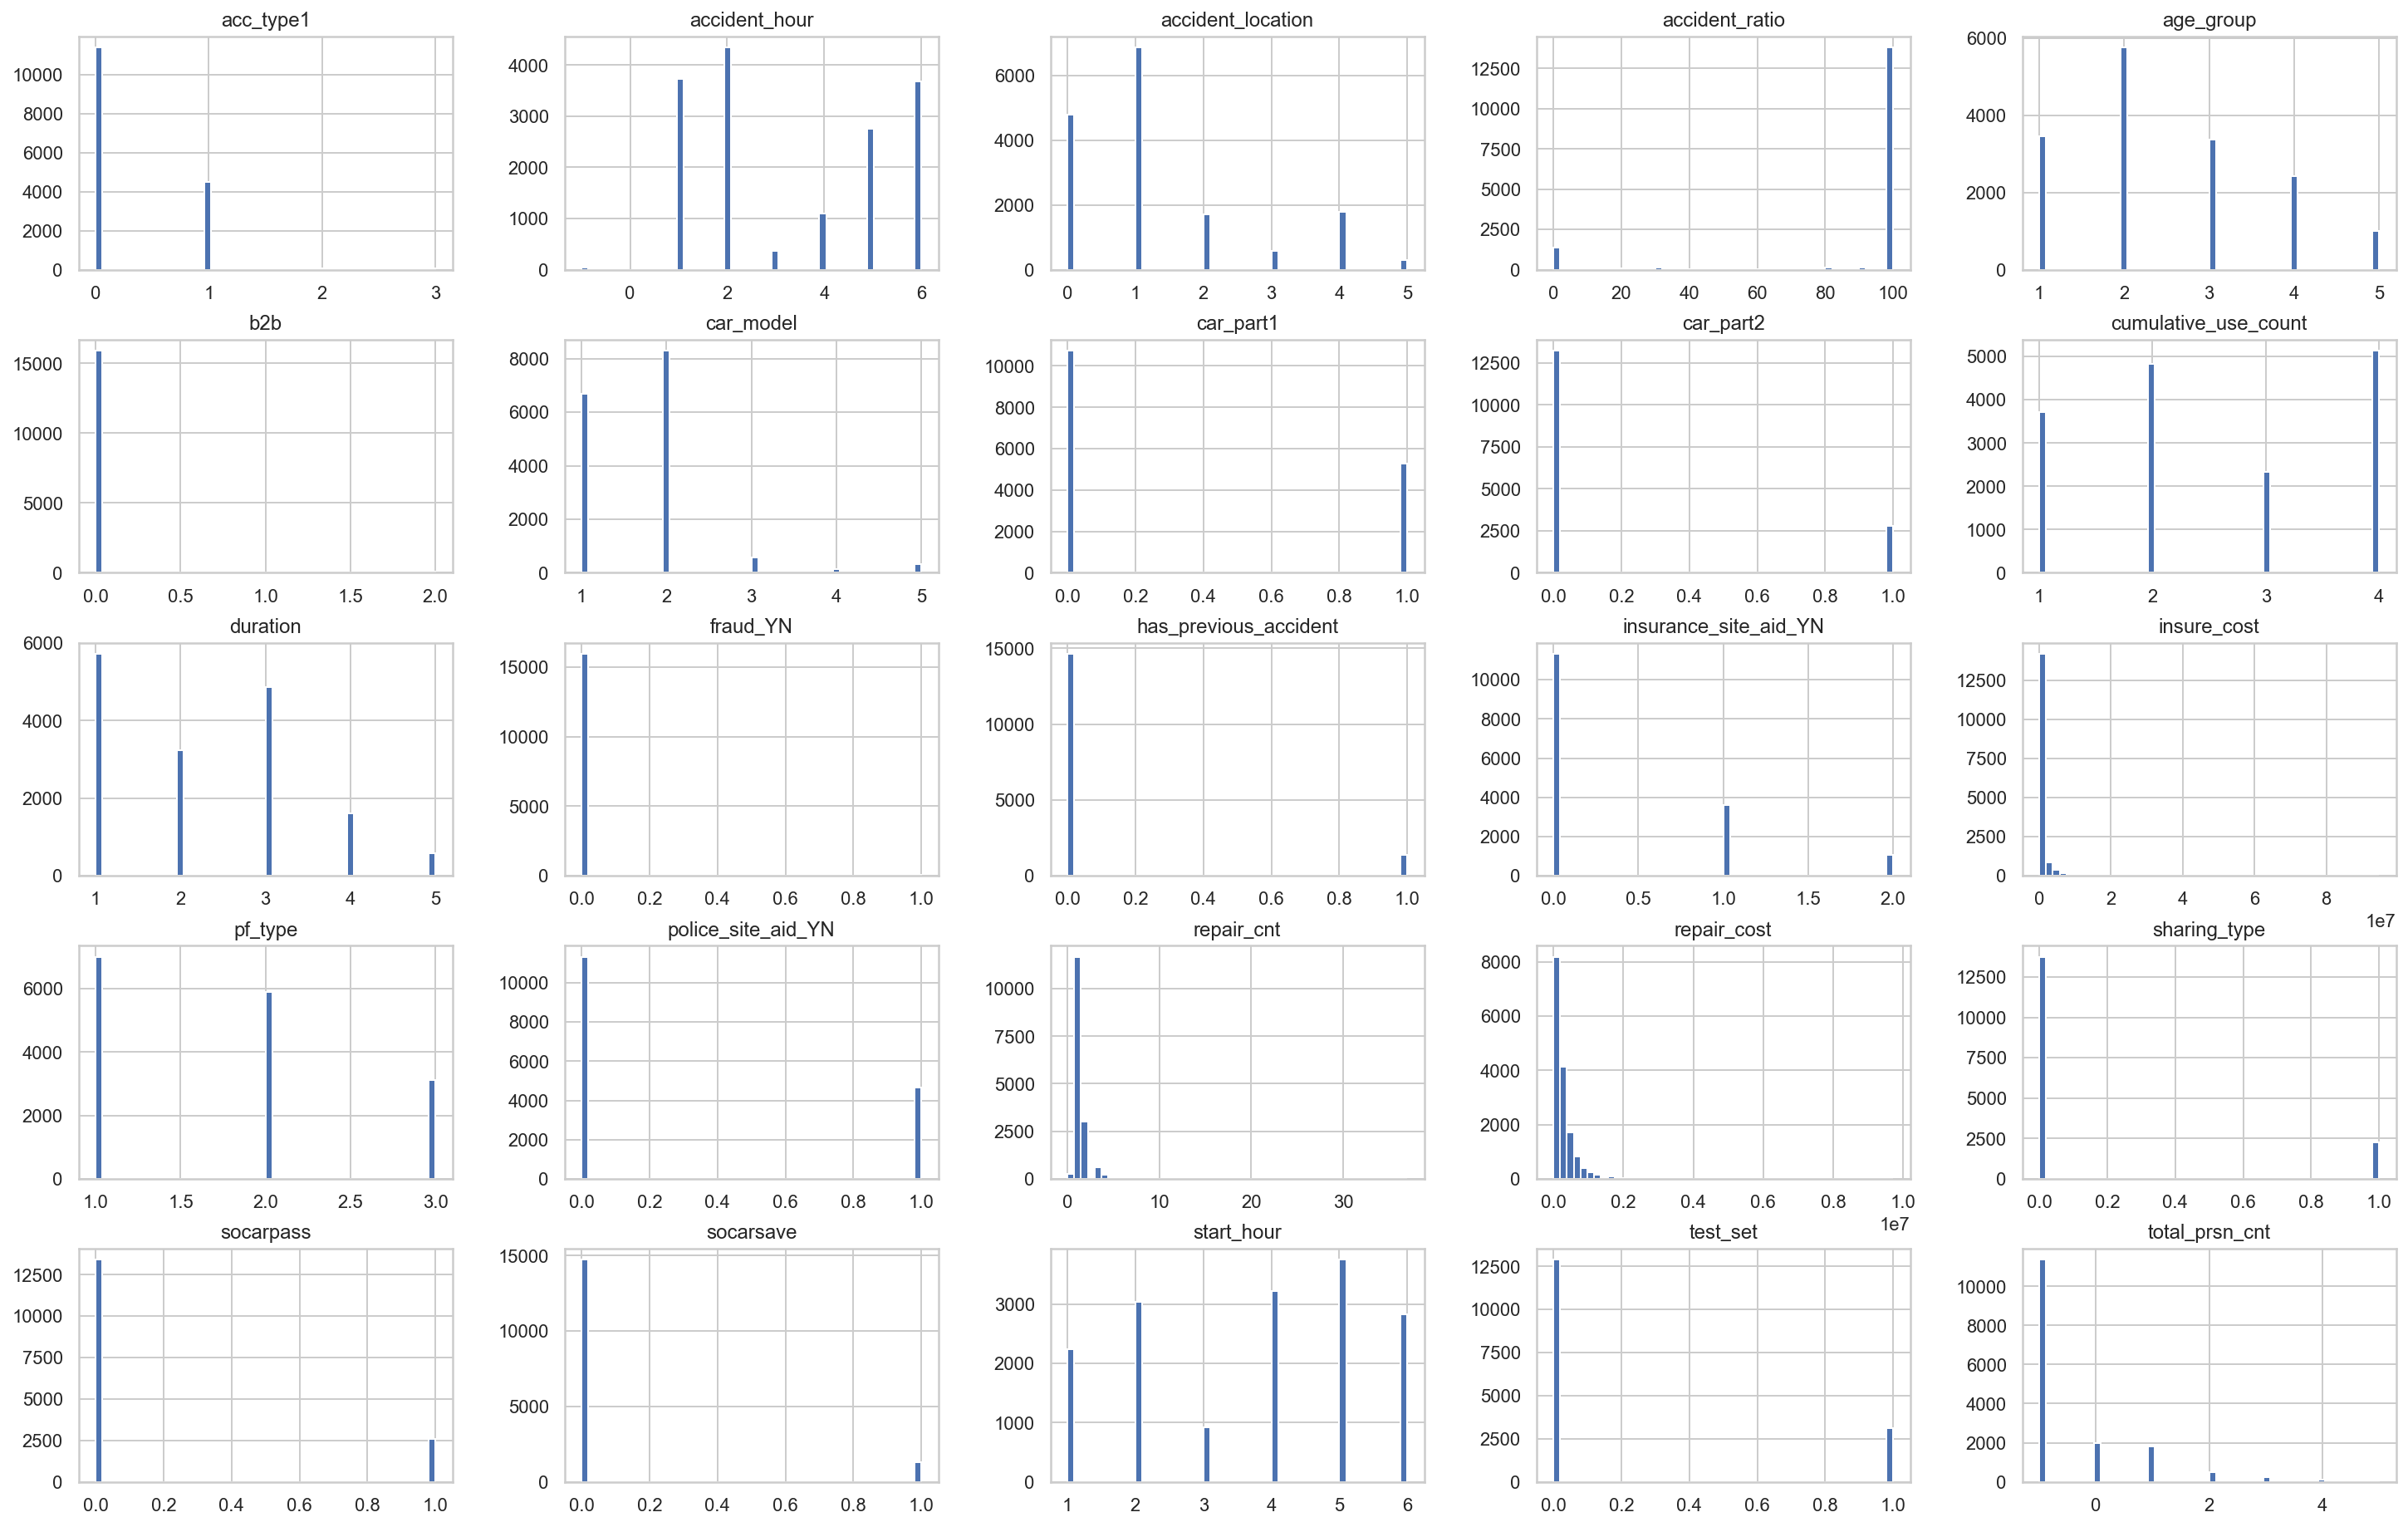

In [40]:
socar.hist(bins=50, figsize=(25, 16))
plt.show()

In [41]:
fraud = socar[socar["fraud_YN"] == 1]
normal = socar[socar["fraud_YN"] == 0]

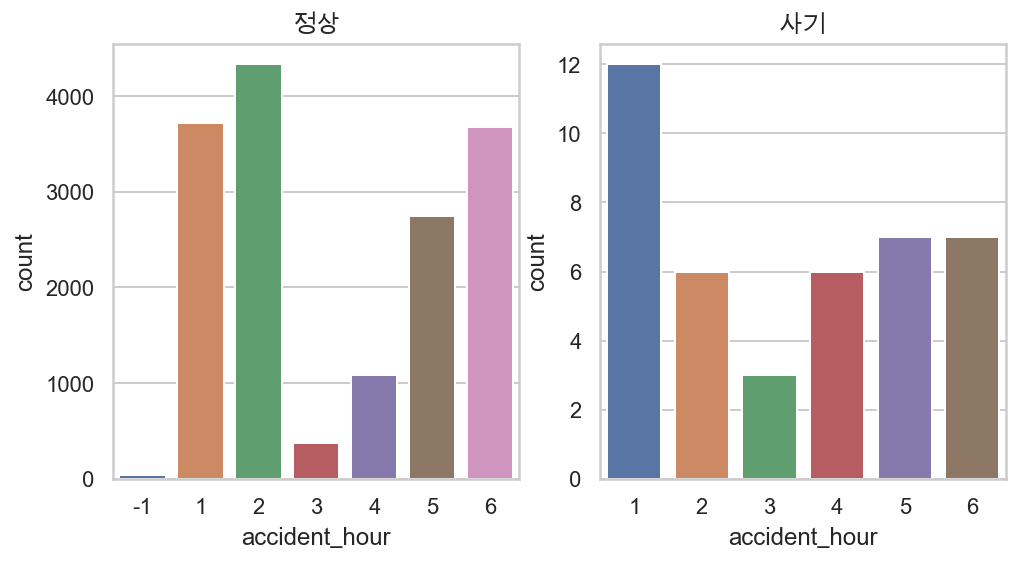

In [42]:
# 사기인 경우 21시에서 4시 사이에 사고가 많이 일어난다.
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='accident_hour', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='accident_hour', ax=ax[1]).set_title('사기');

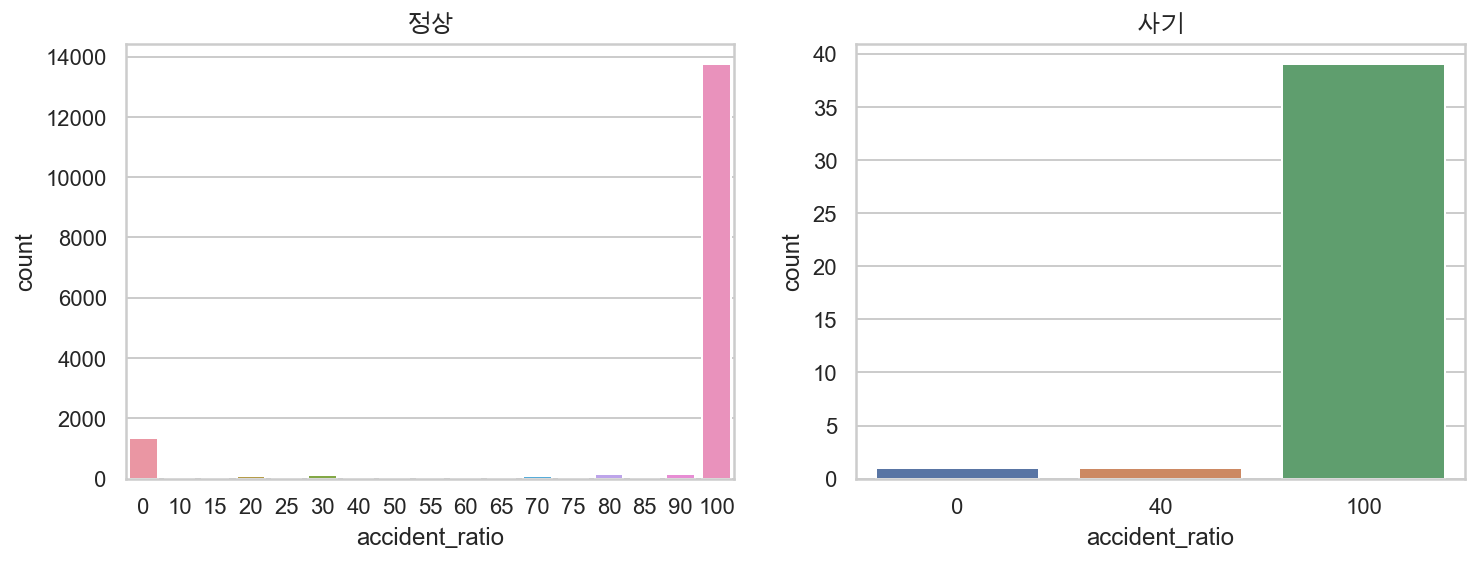

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=normal, x='accident_ratio', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='accident_ratio', ax=ax[1]).set_title('사기');

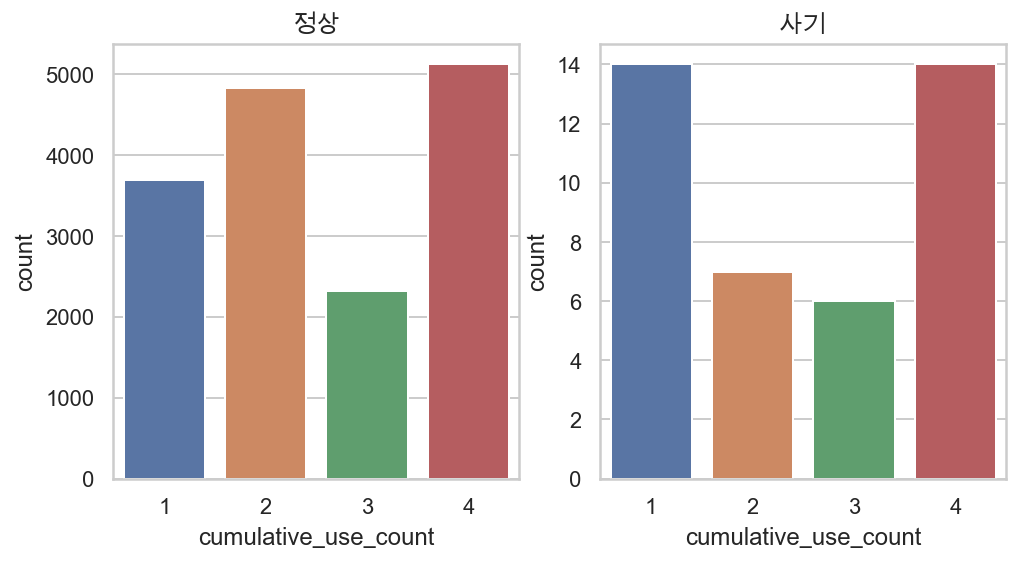

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='cumulative_use_count', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='cumulative_use_count', ax=ax[1]).set_title('사기');

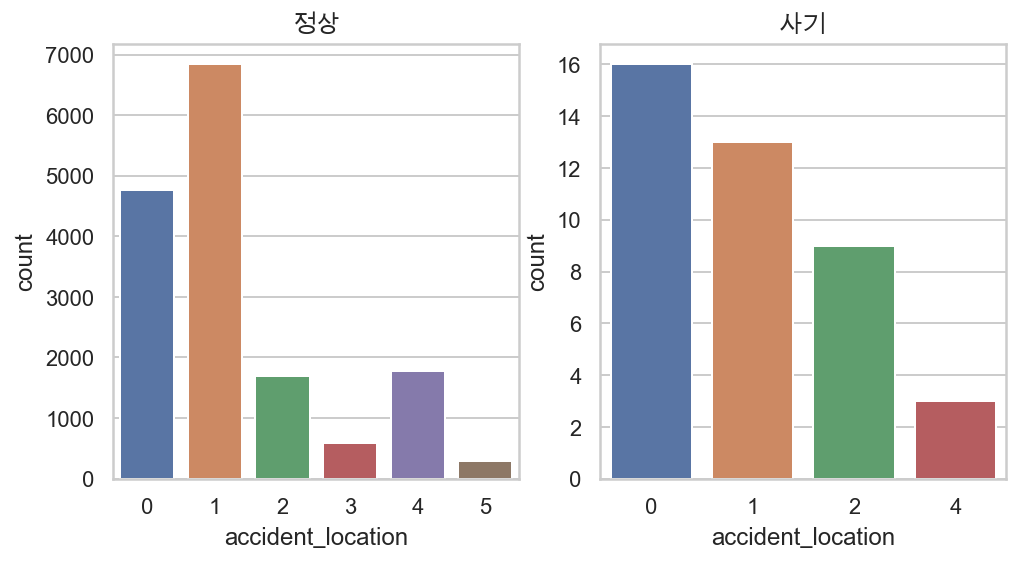

In [45]:
# 일반적인 사고의 경우 일반도로에서 사고가 가장 많이 나지만 사기건의 경우 주차장에서 가장 많이 일어난다.
# 아마도 경미한 사고로 보험금을 얻으려다보니 주차장이 많이 선택되지 않았을까 생각한다.
# 사기건은 고속도로에서 발생하지 않는데 행삭제를 하는건 어떨까?
# 확인불가의 경우 최빈값인 일반도로로 변경했으면..
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='accident_location', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='accident_location', ax=ax[1]).set_title('사기');

In [46]:
len(socar[socar["accident_location"] == 3])

588

In [47]:
len(socar[socar["accident_location"] == 5])

288

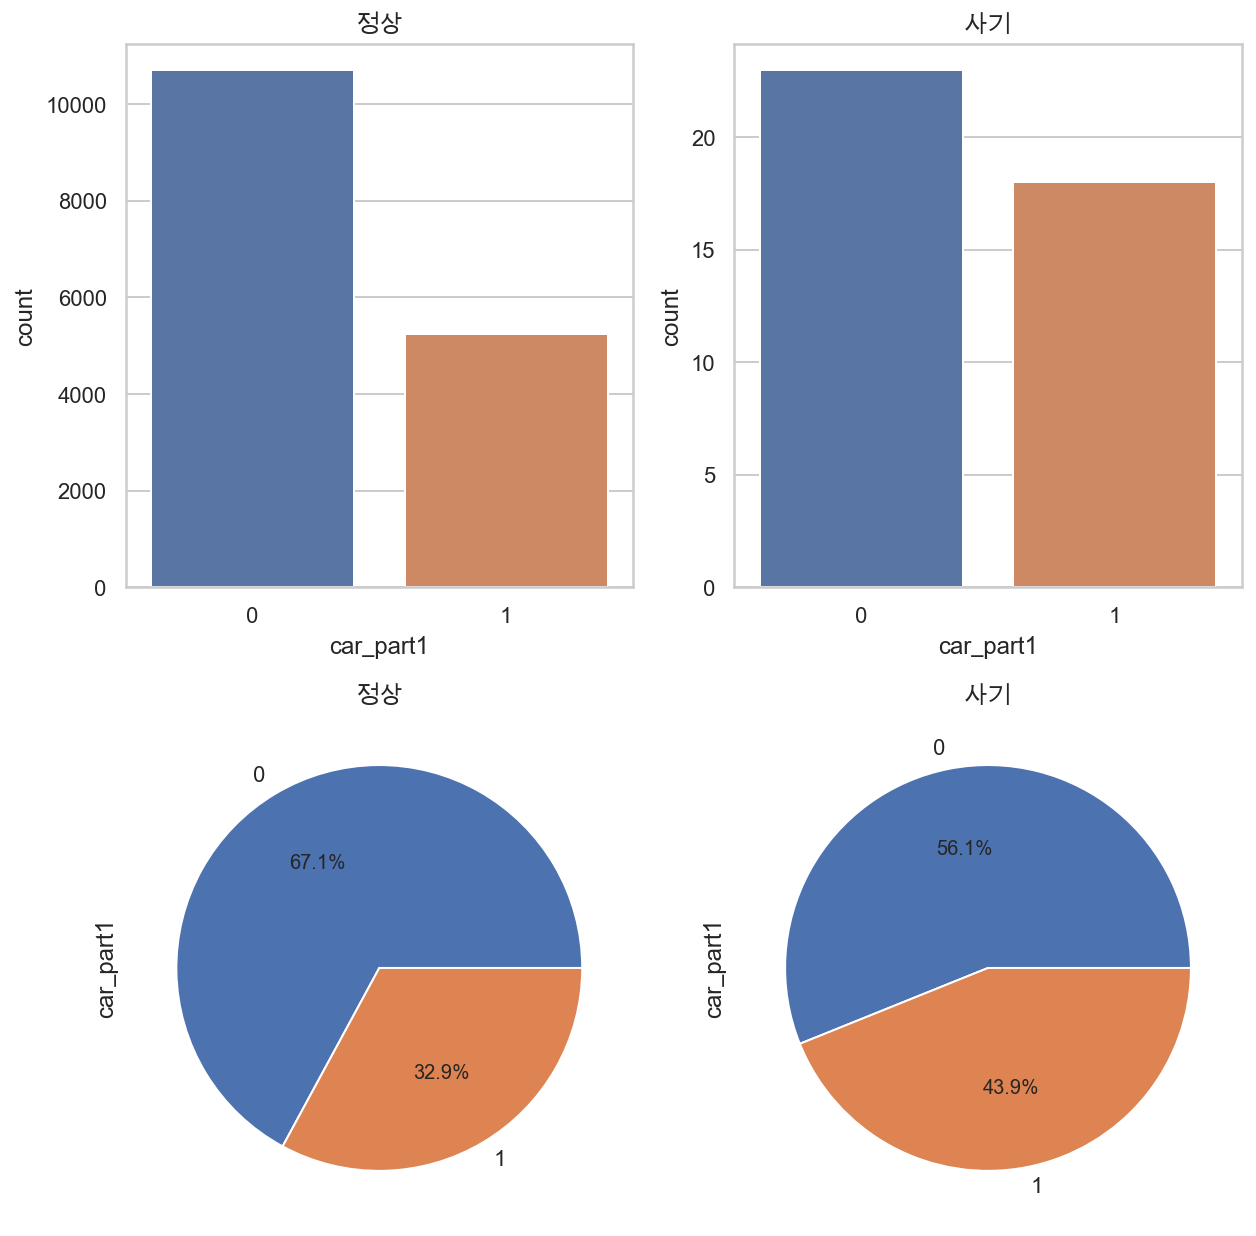

In [48]:
# 사기 사건인 경우가 비율적(11%)으로 앞범퍼가 손상이 더 많이 되는 것 같다.
fig, ax = plt.subplots(2, 2, figsize=(10, 11))
plt.subplot(2,2,1)
sns.countplot(data=normal, x='car_part1').set_title('정상');
plt.subplot(2,2,2)
sns.countplot(data=fraud, x='car_part1').set_title('사기');
plt.subplot(2,2,3)
normal['car_part1'].value_counts().plot.pie(autopct='%1.1f%%').set_title('정상');
plt.subplot(2,2,4)
fraud['car_part1'].value_counts().plot.pie(autopct='%1.1f%%').set_title('사기');

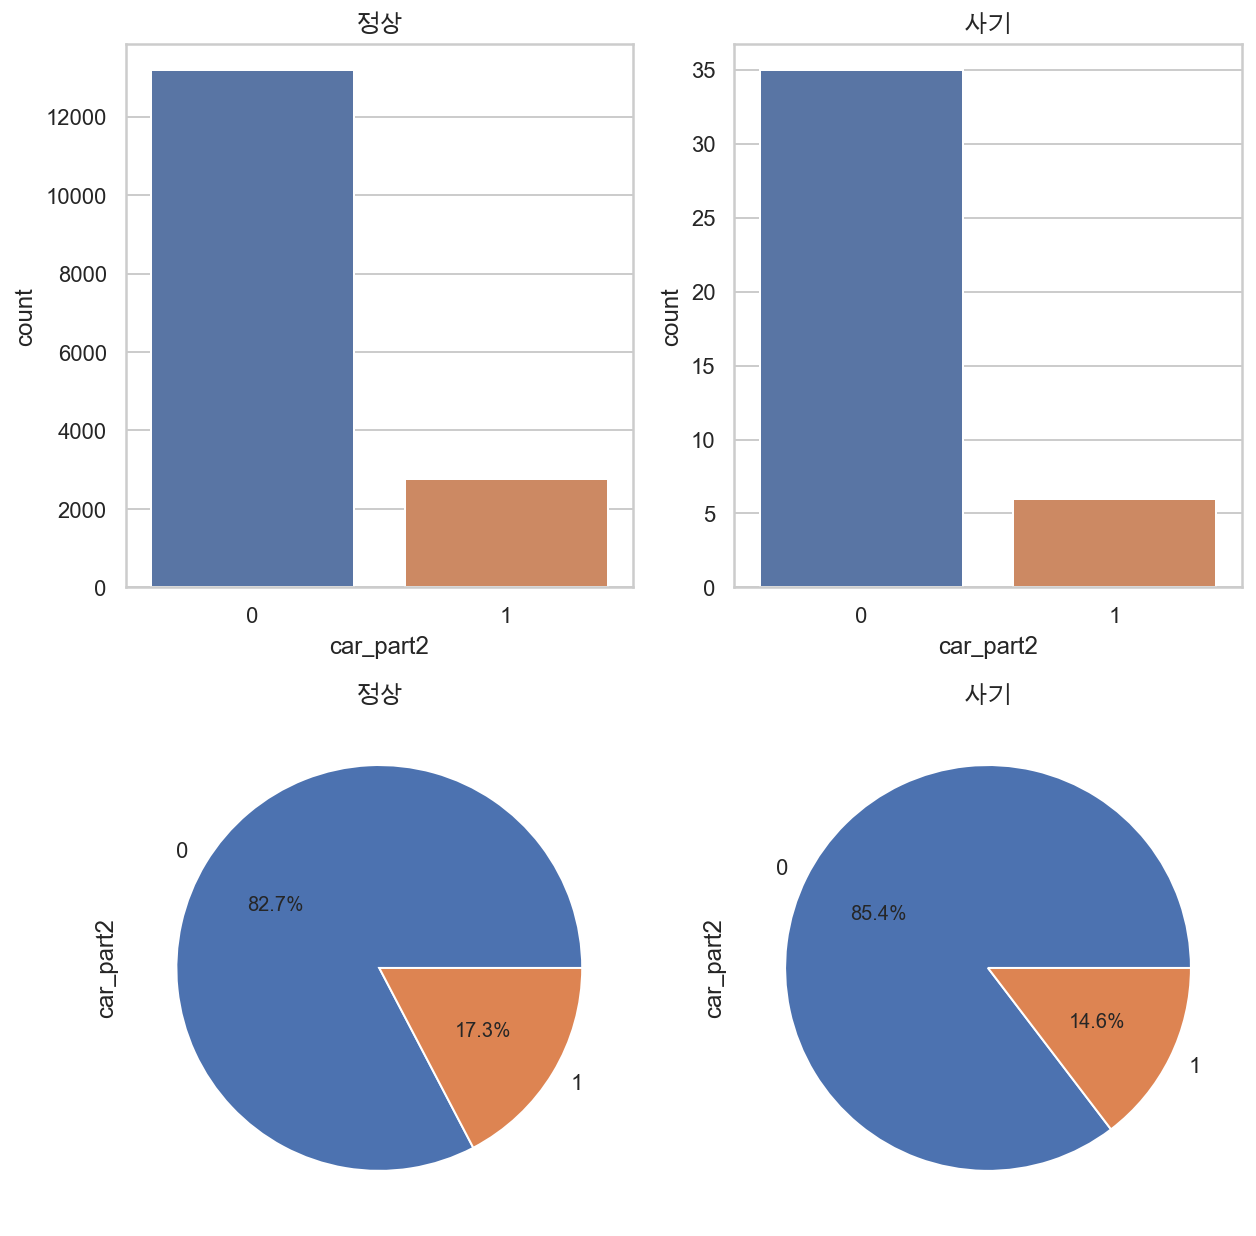

In [49]:
# car_part2는 비율이 비슷하게 나와서(2.7%정도 밖에 차이 안남) 컬럼을 삭제하는 것이 좋을 것 같다.

fig, ax = plt.subplots(2, 2, figsize=(10, 11))
plt.subplot(2,2,1)
sns.countplot(data=normal, x='car_part2').set_title('정상');
plt.subplot(2,2,2)
sns.countplot(data=fraud, x='car_part2').set_title('사기');
plt.subplot(2,2,3)
normal['car_part2'].value_counts().plot.pie(autopct='%1.1f%%').set_title('정상');
plt.subplot(2,2,4)
fraud['car_part2'].value_counts().plot.pie(autopct='%1.1f%%').set_title('사기');

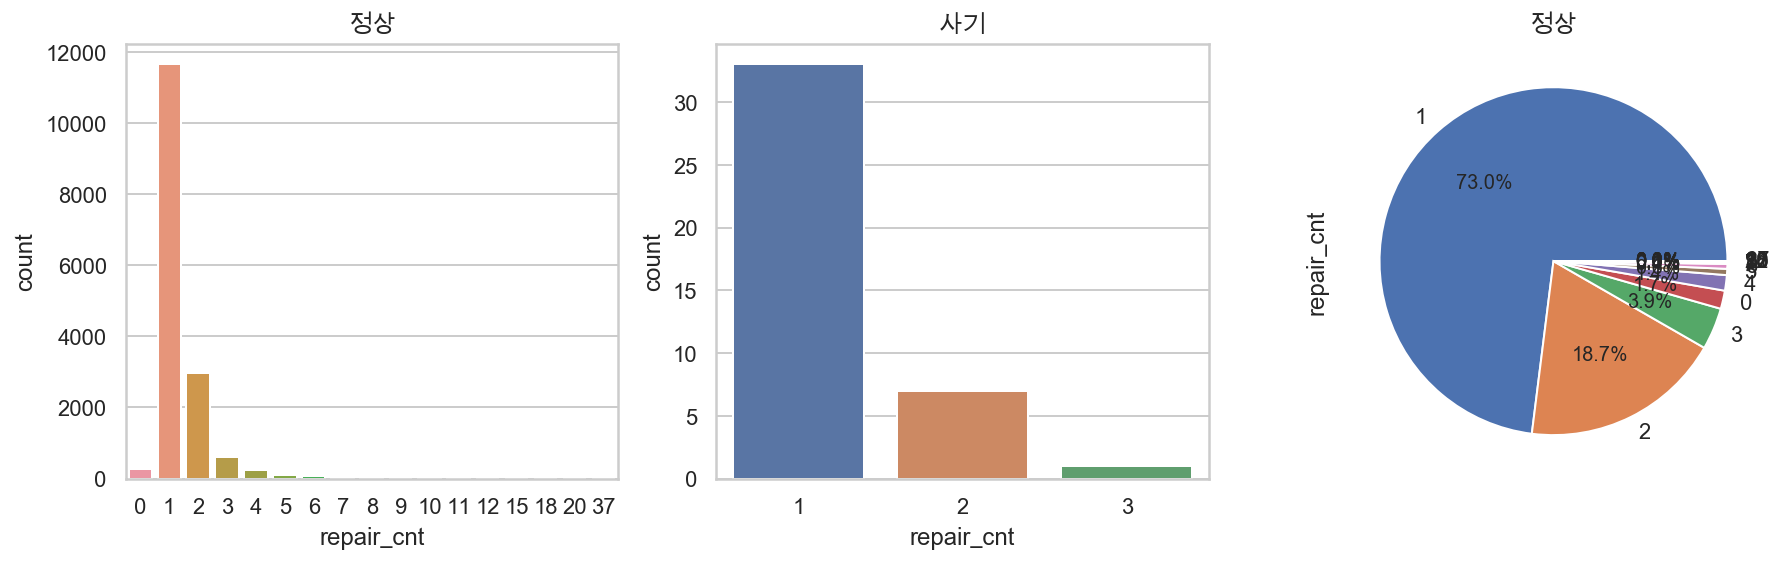

In [50]:
# 사기인 경우 repair_cnt의 개수가 3에서 끝난다. 
# 아마도 다치지 않을 정도로만 사고를 내려고 하다보니 심한 사고가 나지 않아 수리개수가 적은 것 같다.
# repair_cnt의 분포가 넓은데 전처리를 어떻게 할 지 고민해보면 좋을 듯. 
# 9회 이상의 값은 하나로 묶던지 데이터를 삭제하는 것이 좋을 것 같다.
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(data=normal, x='repair_cnt', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='repair_cnt', ax=ax[1]).set_title('사기');
socar['repair_cnt'].value_counts().plot.pie(autopct='%1.1f%%').set_title('정상');

In [51]:
socar[(socar["repair_cnt"] == 0) & (socar["insure_cost"]>0)]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
78,0,2,0,1,0,1,0,100,1,0,0,2,1,2,0.0000,610000,1,0,0,0,1,1,1,1,1
123,0,1,0,3,1,4,0,90,1,0,0,2,3,3,867033.8609,7925490,0,0,0,0,1,1,1,0,0
269,0,1,0,2,0,1,0,100,2,0,0,1,2,1,720624.2367,739100,0,0,0,0,1,1,1,0,0
280,0,2,0,1,0,1,0,100,1,0,0,5,4,6,347654.6200,681000,5,0,0,0,1,2,1,2,0
445,0,2,0,2,0,1,0,100,2,0,1,6,4,2,0.0000,300000,5,0,0,0,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15523,0,1,0,3,0,2,0,100,3,0,0,2,1,1,567632.7906,2000000,4,0,0,0,0,0,0,-1,0
15555,0,2,0,2,0,4,0,90,2,0,0,6,3,1,223232.0953,2749180,0,0,0,0,1,1,1,3,0
15638,0,1,0,2,0,4,0,100,2,0,0,2,2,1,295660.2089,550000,0,0,0,0,1,1,1,0,0
15701,0,1,0,1,0,1,0,100,1,0,0,1,1,1,0.0000,1600000,0,0,0,0,1,1,1,0,0


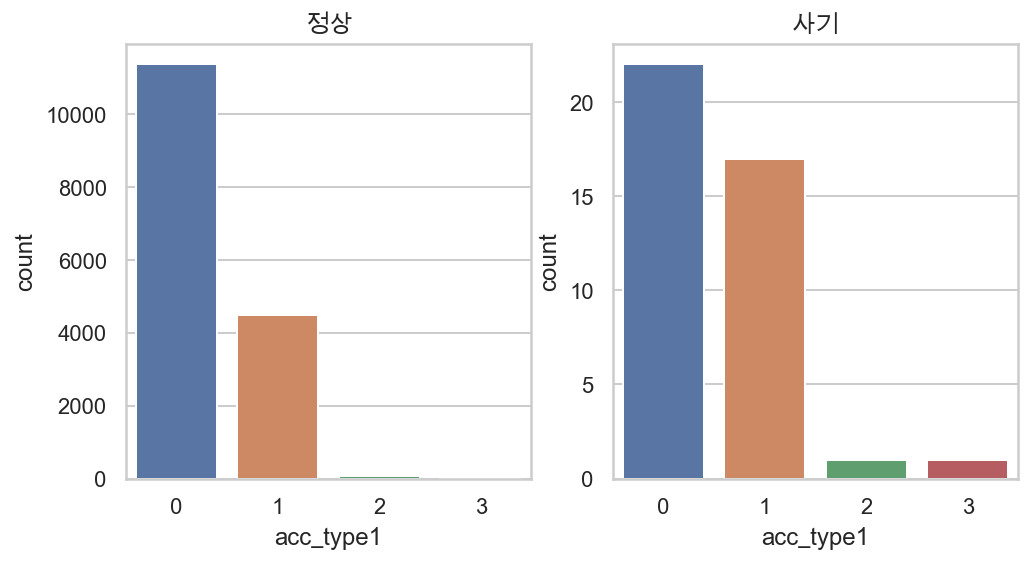

In [52]:
# 사기건이 차대차 사고의 비율이 더 높다. 
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='acc_type1', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='acc_type1', ax=ax[1]).set_title('사기');

In [53]:
# 사기건에 뒷쿵사기만 있는 것이 아니라 차대인, 차량 단독 사기건도 있다. 
# 차대인의 사고의 경우 insurecost가 약 400만원 정도 나왔다.
fraud[fraud["acc_type1"]==2]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
119,1,2,1,5,0,4,0,100,3,1,0,2,3,2,0.0,4192150,0,0,0,1,2,1,1,2,0


In [54]:
fraud[fraud["acc_type1"]==3]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
282,1,2,1,2,0,3,0,100,1,1,0,4,3,6,0.0,670000,0,1,0,1,3,2,1,2,1


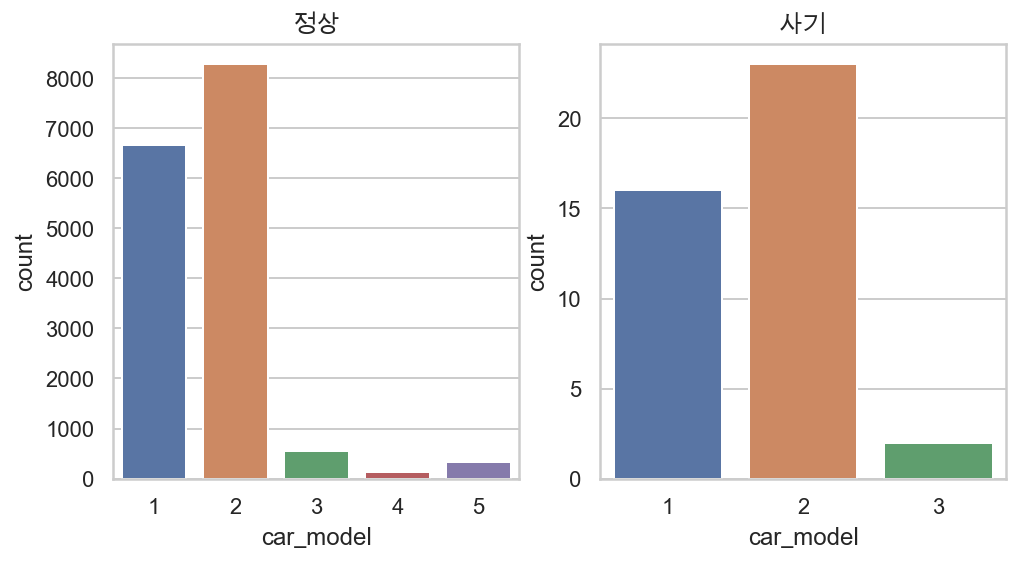

In [55]:
# 레져용 차량이나 전기차 그리고 수입차는 사기건에 쓰이지 않음 
# 레져용 차량이나 전기차 차량은 학습데이터에서 제외해도 될 것 같다.
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='car_model', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='car_model', ax=ax[1]).set_title('사기');

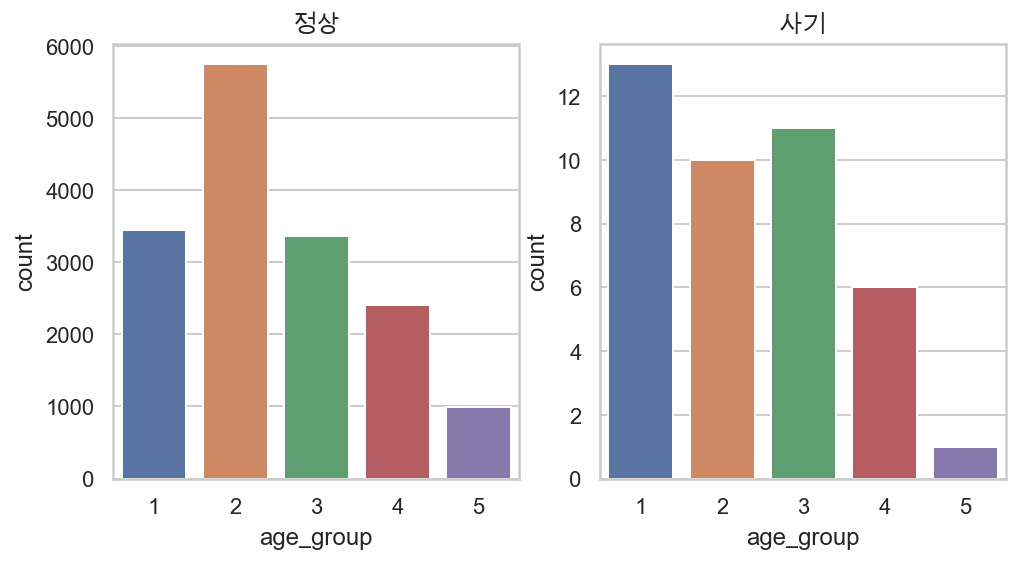

In [56]:
# 사기건은 21세그룹이 제일 많았고 그 다음으로 27세그룹 23세그룹이었다. 
# 20대 초반이 사기를 많이 공모하는 것을 알 수 있었다.
# 아니면 사기가 어수룩해서 더 많이 사기임이 밝혀졌을 수도 있겠다는 생각을 했다. 
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='age_group', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='age_group', ax=ax[1]).set_title('사기');

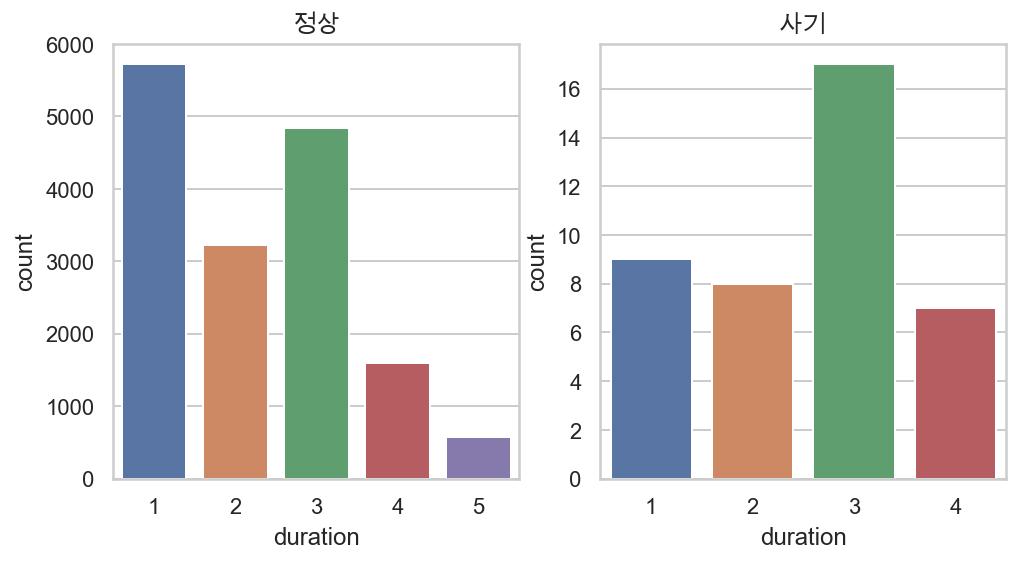

In [57]:
# 사기의 경우 3일 대여 비율이 높다. 
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='duration', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='duration', ax=ax[1]).set_title('사기');

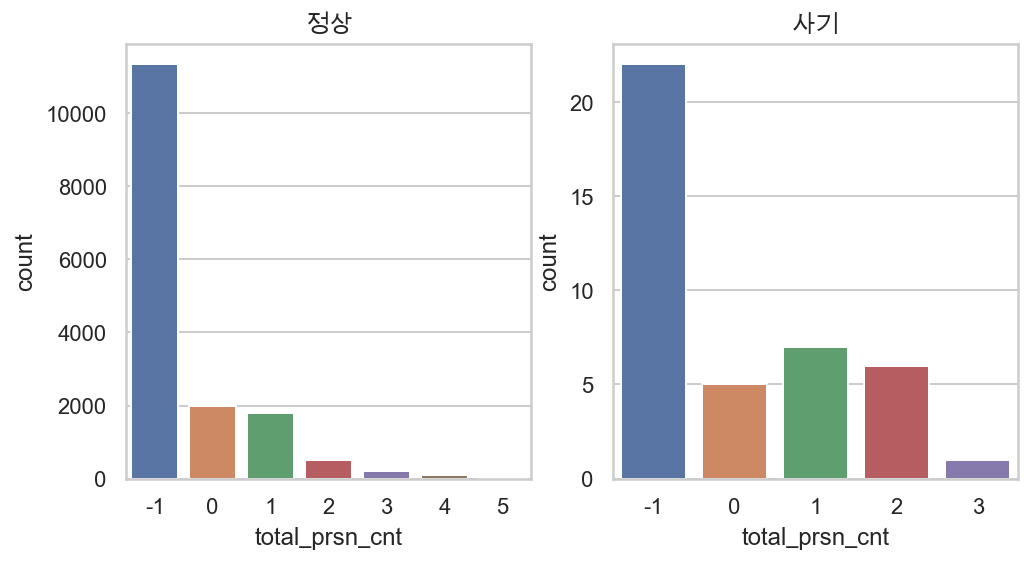

In [58]:
# 사기인 경우 탑승인원이 4명 이상인 경우가 없다.
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='total_prsn_cnt', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='total_prsn_cnt', ax=ax[1]).set_title('사기');

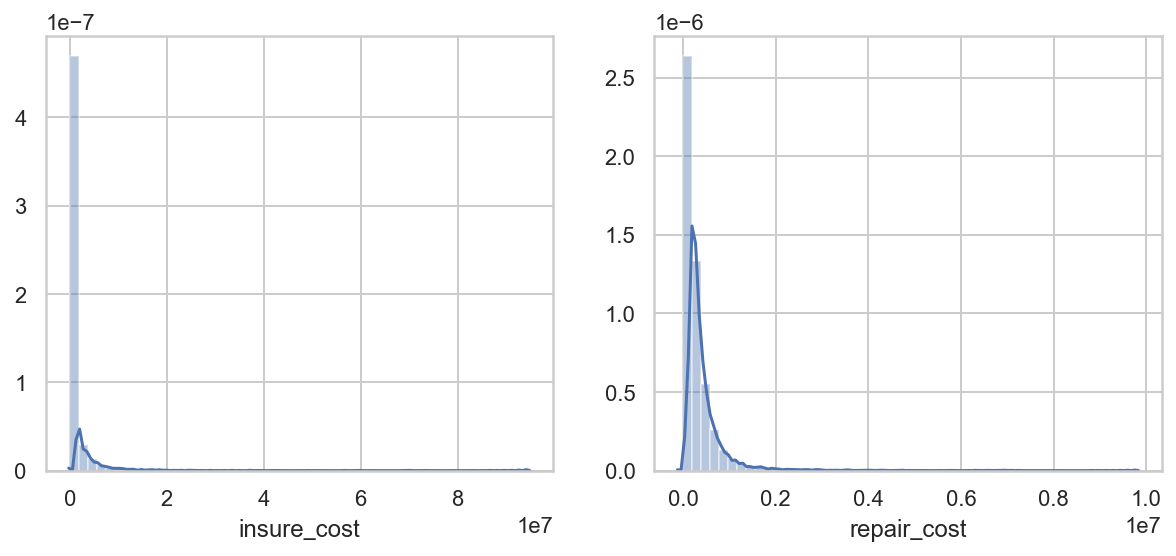

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.distplot(socar["insure_cost"], ax=ax[0])
sns.distplot(socar["repair_cost"], ax=ax[1])
plt.show()

In [60]:
socar_copy = socar.copy()
for i, j in socar_copy.iterrows():
    if j['insure_cost'] == 0:
        socar_copy.loc[i, 'insure_cost'] = 0
    else:
        socar_copy.loc[i, 'insure_cost'] = 1

socar_copy['insure_cost'].value_counts()

0    10424
1     5576
Name: insure_cost, dtype: int64

In [61]:
for i, j in socar_copy.iterrows():
    if j['repair_cost'] == 0:
        socar_copy.loc[i, 'repair_cost'] = 0
    else:
        socar_copy.loc[i, 'repair_cost'] = 1

socar_copy['repair_cost'].value_counts()

1.0    9994
0.0    6006
Name: repair_cost, dtype: int64

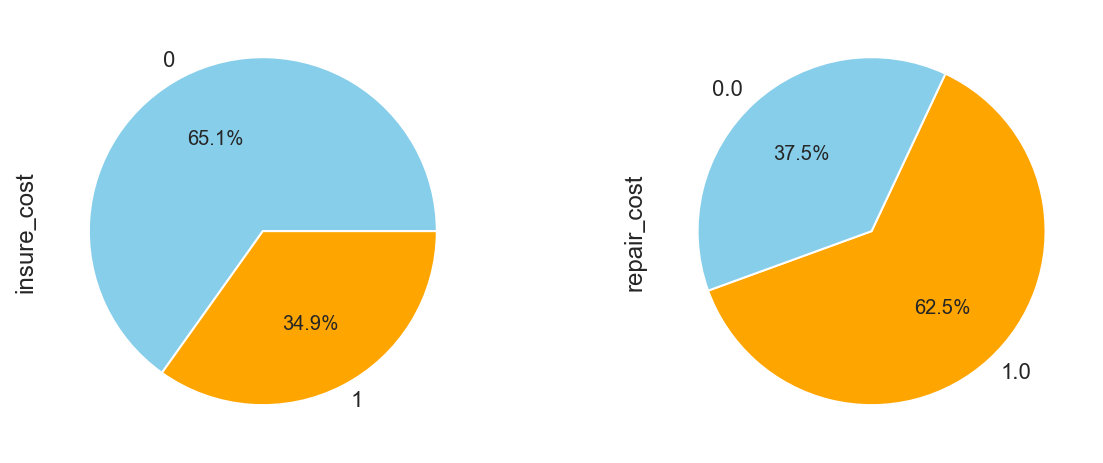

In [62]:
# insure_cost 컬럼의 0의 비율
# 0값이 전체 데이터의 65.1% 차지

# repair_cost컬럼의 0의 비율
# 0값이 전체 데이터의 37.5% 차지

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
socar_copy['insure_cost'].value_counts().plot.pie(autopct='%1.1f%%', colors=["skyblue", "orange"], ax=ax[0])
socar_copy['repair_cost'].value_counts().plot.pie(autopct='%1.1f%%', colors=["orange", "skyblue"], ax=ax[1], startangle=200)
plt.show()

In [63]:
# insure_cost가 누락된 경우라 생각해도 될까?
# 수리비가 나왔는데 보험료가 안나오는 경우
socar[(socar["insure_cost"] == 0) & (socar["repair_cost"] > 0)]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,0,4,2,4,1.302547e+05,0,1,0,0,1,0,0,0,-1,0
3,0,3,1,3,0,4,0,0,2,0,0,3,3,5,1.341009e+06,0,3,1,0,1,0,0,0,-1,0
9,0,2,0,4,0,4,0,100,1,0,1,5,1,5,5.973138e+05,0,2,1,0,1,0,0,0,-1,1
10,0,3,0,1,0,1,0,100,3,0,0,6,4,-1,2.480358e+05,0,5,0,0,0,0,0,0,-1,0
11,0,1,0,1,0,2,0,100,2,0,0,6,1,6,3.949387e+05,0,4,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15989,0,1,0,2,0,4,0,100,3,1,0,4,3,1,3.465002e+05,0,0,0,0,2,0,0,0,-1,0
15991,0,1,0,2,0,3,0,100,2,0,0,5,3,6,1.248872e+06,0,1,0,0,1,0,0,0,-1,0
15992,0,2,0,2,0,2,0,100,3,0,0,1,3,1,1.086347e+06,0,4,0,0,2,0,0,0,-1,1
15994,0,2,0,3,1,4,0,100,1,0,0,4,1,4,6.672931e+05,0,0,0,0,1,0,0,0,-1,0


In [64]:
# 반대로 보험료는 나왔는데 차수리비가 안나오는 경우
socar[(socar["insure_cost"] > 0) & (socar["repair_cost"] == 0)]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
5,0,2,1,3,0,1,0,100,1,0,1,6,2,6,0.0,4777030,1,1,0,1,1,1,1,0,1
6,1,1,1,3,0,4,0,100,3,0,0,6,3,1,0.0,1217280,0,0,0,1,1,2,1,2,0
21,0,2,0,3,0,4,0,100,2,0,0,4,3,4,0.0,355200,1,0,0,2,0,0,0,-1,0
54,0,1,0,3,0,1,0,100,3,0,0,2,1,1,0.0,1950000,1,0,0,1,1,1,1,1,1
58,0,1,0,4,0,3,0,100,1,0,0,1,1,1,0.0,3266020,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15945,0,1,0,2,0,3,0,100,3,0,0,5,1,6,0.0,4043400,3,1,0,1,0,0,0,-1,0
15947,0,1,0,5,0,4,0,100,2,0,0,4,1,4,0.0,593070,0,0,1,2,1,1,1,0,0
15957,0,2,0,2,0,4,0,100,1,0,0,6,5,2,0.0,345390,1,1,0,2,0,0,0,-1,0
15978,0,1,0,2,0,4,0,100,3,0,0,5,1,6,0.0,1708720,0,0,0,1,1,1,1,1,1


In [65]:
# 결국 정상적으로 수리비와 보험료가 정상적으로 입력된 경우는 3643건 밖에 되지 않는다.
socar[(socar["insure_cost"] > 0) & (socar["repair_cost"] > 0)]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
2,0,1,0,4,1,4,0,100,3,1,0,1,4,6,2.581306e+05,12925040,3,1,0,2,1,1,1,0,1
4,0,1,0,1,0,1,0,100,1,0,0,1,1,1,5.240306e+05,1209410,1,0,0,2,0,0,0,-1,0
7,0,3,1,3,0,4,0,100,3,1,0,6,2,1,2.680625e+05,250000,2,0,0,1,1,1,1,1,1
16,0,1,0,4,0,4,0,100,1,0,0,6,1,6,2.912127e+06,8029560,3,1,0,2,1,1,1,0,0
17,0,2,0,1,0,4,0,100,2,0,0,1,1,1,2.723891e+05,945740,0,0,0,1,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15982,0,2,0,3,0,1,0,100,1,0,0,6,3,2,1.470250e+05,1699120,1,0,0,1,0,0,0,-1,0
15984,0,2,0,2,0,1,0,100,1,0,0,6,2,2,3.498486e+05,810230,0,0,0,1,1,1,1,1,1
15985,0,2,0,4,0,2,0,100,2,0,0,5,3,6,2.331482e+05,350000,0,0,1,1,0,0,0,-1,0
15986,0,2,0,3,0,3,0,100,3,0,0,4,2,5,1.548052e+05,552080,0,0,0,0,1,1,1,1,0


In [66]:
# 이 경우는 두 가지 다 누락됬다고 볼 수 있다. 
socar[(socar["insure_cost"] == 0) & (socar["repair_cost"] == 0)]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
1,0,1,0,4,0,4,0,0,3,1,0,1,4,4,0.0,0,1,1,1,2,1,1,1,0,1
8,0,2,0,4,0,4,0,0,1,0,0,4,2,6,0.0,0,1,0,0,1,1,1,1,2,0
14,0,1,0,5,0,3,0,100,2,0,0,5,3,1,0.0,0,0,0,0,1,0,0,0,-1,0
15,0,1,1,1,0,1,0,0,1,0,0,5,2,2,0.0,0,1,1,0,1,0,0,0,-1,0
20,0,2,0,1,0,3,0,100,1,0,0,2,5,2,0.0,0,4,1,0,1,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15987,0,1,0,3,1,4,0,100,1,1,0,5,3,2,0.0,0,0,0,0,1,0,0,0,-1,0
15993,0,1,0,3,0,4,0,100,1,0,0,5,1,6,0.0,0,1,0,0,2,0,0,0,-1,0
15995,0,2,0,2,0,2,0,100,2,0,0,1,1,1,0.0,0,1,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,0,1,3,5,0.0,0,0,0,0,1,0,0,0,-1,1
